In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [30]:
universal = pd.read_csv('/Users/linanguyen/Desktop/universal_studio_branches.csv')
universal.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [31]:
#checking for null values
universal.isnull().sum()


reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

In [32]:
#check for unique values 
universal.nunique()

reviewer        44086
rating              5
written_date     4276
title           37522
review_text     50847
branch              3
dtype: int64

In [33]:
#checking for shape
universal.shape

(50904, 6)

In [34]:
#checking for data types
universal['rating'] = pd.to_numeric(df['rating'])
universal.dtypes

reviewer         object
rating          float64
written_date     object
title            object
review_text      object
branch           object
dtype: object

In [35]:
#changing written data to actual date
universal['written_date'] = pd.to_datetime(universal['written_date'])
universal.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


Text(0.5, 1.0, 'Frequency of Universal Studio Ratings')

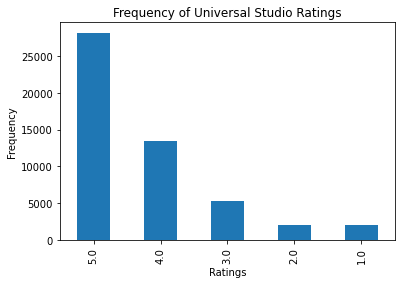

In [36]:
#frequency of ratings
rating = df['rating']
fig, ax = plt.subplots()
rating.value_counts().plot(ax=ax, kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Universal Studio Ratings')

In [37]:
#view value counts
rating.value_counts()

5.0    28202
4.0    13514
3.0     5229
2.0     1986
1.0     1973
Name: rating, dtype: int64

In [49]:
#ratings vs date
#breaking data into date, month, and year
universal['written_date'] = pd.to_datetime(universal['written_date'], format = '%Y%m%d')
universal['year'] = pd.DatetimeIndex(universal['written_date']).year
universal['day'] = pd.DatetimeIndex(universal['written_date']).day
universal['month'] = pd.DatetimeIndex(universal['written_date']).month
universal

,reviewer,rating,written_date,title,review_text,branch,year,day,month
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,2021,30,5
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,2021,30,5
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,2021,30,5
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,2021,29,5
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,2021,28,5
...,...,...,...,...,...,...,...,...,...
50899,vinz20,4.0,2010-03-29,I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,2010,29,3
50900,betty l,4.0,2010-03-29,Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,2010,29,3
50901,spoonos65,4.0,2010-03-28,Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,2010,28,3
50902,HeatSeekerWrexham_UK,4.0,2010-03-22,Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,2010,22,3


In [55]:
print(sorted(universal['year'].unique()))


[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [79]:
#break data into year and rating
yearrat = universal[['year', 'rating']]
yearrat

,year,rating
0,2021,2.0
1,2021,1.0
2,2021,2.0
3,2021,4.0
4,2021,5.0
...,...,...
50899,2010,4.0
50900,2010,4.0
50901,2010,4.0
50902,2010,4.0


In [84]:
#count of ratings per year
yearratbreak1 = yearrat.groupby(['year', 'rating']).size().reset_index(name = 'count')
yearratbreak1

,year,rating,count
0,2002,1.0,1
1,2003,4.0,3
2,2003,5.0,4
3,2004,1.0,9
4,2004,2.0,5
...,...,...,...
88,2021,1.0,87
89,2021,2.0,35
90,2021,3.0,29
91,2021,4.0,42


In [140]:
rat1 = yearratbreak1.loc[yearratbreak1['rating'] == 1.0]
rat1

rat1count = [1, 0, 9, 6, 9, 11, 14, 17, 38, 46, 79, 117, 169, 227, 253, 206, 288, 297, 99, 87]

In [141]:
rat2 = yearratbreak1.loc[yearratbreak1['rating'] == 2.0]
rat2

rat2count = [0, 0, 5, 7, 10, 13, 14, 17, 56, 70, 98, 138, 220, 268, 286, 229, 239, 228, 53, 35]

In [142]:
rat3 = yearratbreak1.loc[yearratbreak1['rating'] == 3.0]
rat3

rat3count = [0, 0, 4, 3, 7, 3, 7, 32, 68, 159, 260, 425, 622, 852, 850, 648, 644, 503, 113, 29]

In [143]:
rat4 = yearratbreak1.loc[yearratbreak1['rating'] == 4.0]
rat4

rat4count = [0, 3, 11, 5, 11, 19, 32, 37, 124, 329, 738, 1149, 1574, 2393, 2489, 1848, 1448, 1052, 210, 42]

In [144]:
rat5 = yearratbreak1.loc[yearratbreak1['rating'] == 5.0]
rat5 
rat5count = [0, 4, 28, 19, 23, 34, 27, 66, 128, 394, 1095, 1960, 2867, 5361, 5422, 4212, 3556, 2390, 524, 92]

In [150]:
#ratings per year

year = list(range(2002, 2022, 1))
year

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Text(0.5, 1.0, 'Universal Studios Ratings by Year')

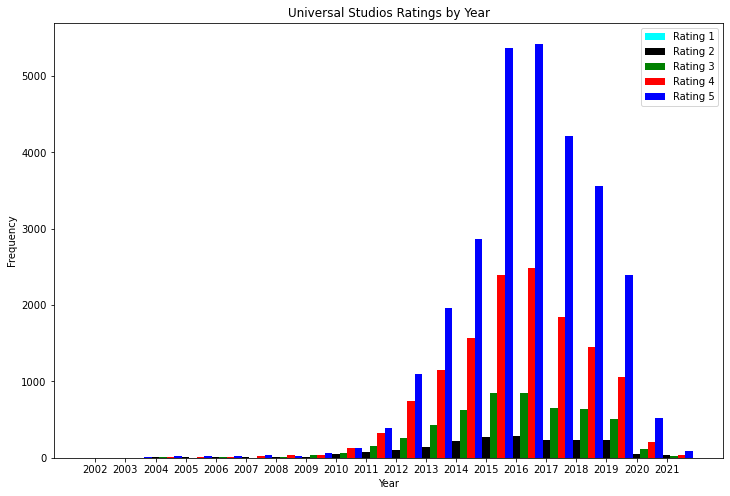

In [158]:
#barchart of rating by year
fig  = plt.subplots(figsize = (12, 8))
barWidth = 0.25

#set position of bar on X axis
br1 = np.arange(len(year))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

#Make plot
plt.bar(br1, rat1count, color = 'cyan', width = barWidth, label = 'Rating 1')
plt.bar(br2, rat2count, color = 'black', width = barWidth, label = 'Rating 2')
plt.bar(br3, rat3count, color = 'green', width = barWidth, label = 'Rating 3')
plt.bar(br4, rat4count, color = 'red', width = barWidth, label = 'Rating 4')
plt.bar(br5, rat5count, color = 'blue', width = barWidth, label = 'Rating 5')

#Adding ticks
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks([r + barWidth for r in range(len(year))], ['2002', '2003', '2004', '2005', '2006','2007','2008','2009','2010','2011','2012', '2013', '2014','2015','2016','2017', '2018','2019','2020','2021'])

plt.legend()
plt.title('Universal Studios Ratings by Year')

Text(0.5, 1.0, 'Stacked Barchart Universal Studios Ratings by Year')

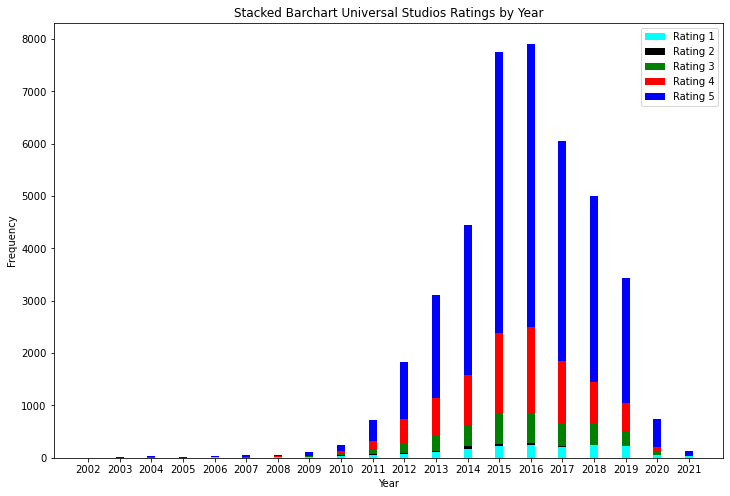

In [176]:
#stacked barplot
fig  = plt.subplots(figsize = (12, 8))
plt.bar(year, rat1count, color = 'cyan', width = barWidth, label = 'Rating 1')
plt.bar(year, rat2count, bottom = rat1count, color = 'black', width = barWidth, label = 'Rating 2')
plt.bar(year, rat3count, bottom = rat2count, color = 'green', width = barWidth, label = 'Rating 3')
plt.bar(year, rat4count, bottom = rat3count, color = 'red', width = barWidth, label = 'Rating 4')
plt.bar(year, rat5count, bottom = rat4count, color = 'blue', width = barWidth, label = 'Rating 5')

#Adding ticks
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(year)

plt.legend()
plt.title('Stacked Barchart Universal Studios Ratings by Year')


In [196]:
#create dataframe for year and rating analysis
rat1countdf = pd.DataFrame(rat1count, columns = ['Rating 1'])
rat2countdf = pd.DataFrame(rat2count, columns = ['Rating 2'])
rat3countdf = pd.DataFrame(rat3count, columns = ['Rating 3'])
rat4countdf = pd.DataFrame(rat4count, columns = ['Rating 4'])
rat5countdf = pd.DataFrame(rat5count, columns = ['Rating 5'])

yearratdf['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'] = rat1countdf + rat2countdf + rat3countdf + rat4countdf + rat5countdf
yearratdf

TypeError: list indices must be integers or slices, not tuple

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
#Normalized stacked barplot
normalize_min = 0.1
normalize_max = 1


#Normalize



plt.bar(year, rat1count, color = 'cyan', width = barWidth)
plt.bar(year, rat2count, bottom = rat1count, color = 'black', width = barWidth)
plt.bar(year, rat3count, bottom = rat2count, color = 'green', width = barWidth)
plt.bar(year, rat4count, bottom = rat3count, color = 'red', width = barWidth)
plt.bar(year, rat5count, bottom = rat4count, color = 'blue', width = barWidth)